## 자연어처리 Exp3
### 201800839 김수연

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000,
                                                         test_split = 0.2)

max_len = 100
X_train = pad_sequences(X_train, maxlen = max_len) # 훈련용 뉴스 기사 패딩
X_test = pad_sequences(X_test, maxlen = max_len) # 테스트용 뉴스 기사 패딩

y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

history = model.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs = 20,
                    validation_data = (X_test, y_test))

Epoch 1/20
71/71 [==============================] - 28s 393ms/step - loss: 2.6276 - acc: 0.3329 - val_loss: 2.3827 - val_acc: 0.3620
Epoch 2/20
71/71 [==============================] - 21s 292ms/step - loss: 2.1138 - acc: 0.4511 - val_loss: 1.9994 - val_acc: 0.4955
Epoch 3/20
71/71 [==============================] - 19s 272ms/step - loss: 1.8387 - acc: 0.5219 - val_loss: 1.8300 - val_acc: 0.5236
Epoch 4/20
71/71 [==============================] - 20s 281ms/step - loss: 1.8067 - acc: 0.5310 - val_loss: 1.7630 - val_acc: 0.5534
Epoch 5/20
71/71 [==============================] - 20s 279ms/step - loss: 1.6900 - acc: 0.5608 - val_loss: 1.7158 - val_acc: 0.5650
Epoch 6/20
71/71 [==============================] - 20s 279ms/step - loss: 1.6375 - acc: 0.5731 - val_loss: 1.6700 - val_acc: 0.5717
Epoch 7/20
71/71 [==============================] - 19s 268ms/step - loss: 1.5974 - acc: 0.5919 - val_loss: 1.6821 - val_acc: 0.5819
Epoch 8/20
71/71 [==============================] - 19s 272ms/step - 

## 1. 로이터 뉴스 데이터에서 뉴스 주제 46개를 구하는 프로그램을 작성하고, 데이터 1~50까지 각 뉴스의 주제를 구하여 인쇄하라.

In [3]:
subject_index = np.argwhere(y_test > 0)[:50]
additional_1 = np.array([[1]])
print("[new_num, category_num]")
print()
print(subject_index + additional_1)

[new_num, category_num]

[[ 1  4]
 [ 2 11]
 [ 3  2]
 [ 4  5]
 [ 5  5]
 [ 6  4]
 [ 7  4]
 [ 8  4]
 [ 9  4]
 [10  4]
 [11  6]
 [12  5]
 [13  2]
 [14  4]
 [15  2]
 [16 12]
 [17 24]
 [18  4]
 [19 20]
 [20  4]
 [21  9]
 [22  4]
 [23  4]
 [24  4]
 [25 10]
 [26  4]
 [27  5]
 [28  7]
 [29 11]
 [30  4]
 [31  4]
 [32 11]
 [33 21]
 [34  2]
 [35 20]
 [36  5]
 [37 41]
 [38  2]
 [39  5]
 [40  4]
 [41 16]
 [42 22]
 [43  4]
 [44 35]
 [45  5]
 [46  5]
 [47  4]
 [48  5]
 [49  4]
 [50 12]]


## 2. 로이터 뉴스 프로그램을 LSTM을 사용하지 않고 Dense layer를 이용하여 주제를 구하는 프로그램을 작성하라. 이 프로그램의 정확도와 LSTM 버전 프로그램의 정확도를 비교하라.

### - LSTM 버전 프로그램의 정확도

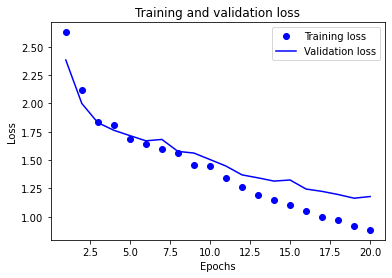

In [4]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [5]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [6]:
results = model.evaluate(X_test, y_test)

71/71 [==============================] - 3s 38ms/step - loss: 1.1786 - acc: 0.7124


In [7]:
results

[1.1786144971847534, 0.7123775482177734]

### - LSTM을 사용하지 않고 Dense layer를 이용하여 주제를 구하는 프로그램

In [ ]:
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000)

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

### - Dense layer를 이용한 프로그램의 정확도

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

In [ ]:
results

## 3. 11월 2일 수업 자료에서 IMDB 영화평 예측 프로그램에서 Dense 네트워크 구조를 1단으로 하면서 셀 숫자를 16, 32, 64개로 했을 때 결과의 정확도가 어떻게 바뀌는지 분석하라.

### - 셀 숫자를 16으로 했을 때

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

import numpy as np
# 입력 텍스트 vectorization
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense( 1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

### - 셀 숫자를 32로 했을 때

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

import numpy as np
# 입력 텍스트 vectorization
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense( 1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

### - 셀 숫자를 64로 했을 때

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

import numpy as np
# 입력 텍스트 vectorization
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense( 1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)